In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
#pd.set_option*'max_columns', 200)


In [ ]:
df=pd.read_csv("Bakery.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ticket_number    3000 non-null   int64  
 1   date             3000 non-null   object 
 2   time             3000 non-null   object 
 3   article          3000 non-null   object 
 4   Quantity         3000 non-null   int64  
 5   unit_price_euro  3000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 140.8+ KB


In [ ]:
df['date']= pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'])   # ubah ke format datetime
df['hour'] = df['time'].dt.hour           # ambil jam-nya saja
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ticket_number    3000 non-null   int64         
 1   date             3000 non-null   datetime64[ns]
 2   time             3000 non-null   datetime64[ns]
 3   article          3000 non-null   object        
 4   Quantity         3000 non-null   int64         
 5   unit_price_euro  3000 non-null   float64       
 6   hour             3000 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(1)
memory usage: 152.5+ KB


In [ ]:
dfn=df.drop_duplicates()

In [ ]:
dfn.duplicated().sum()

np.int64(0)

In [ ]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2995 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ticket_number    2995 non-null   int64         
 1   date             2995 non-null   datetime64[ns]
 2   time             2995 non-null   datetime64[ns]
 3   article          2995 non-null   object        
 4   Quantity         2995 non-null   int64         
 5   unit_price_euro  2995 non-null   float64       
 6   hour             2995 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(1)
memory usage: 175.5+ KB


In [ ]:
df.head(1000)

,ticket_number,date,time,article,Quantity,unit_price_euro,hour
0,150045,2021-01-02,2025-10-17 09:32:00,TRADITIONAL BAGUETTE,3,1.20,9
1,150046,2021-01-02,2025-10-17 09:37:00,TRADITIONAL BAGUETTE,6,1.20,9
2,150049,2021-01-02,2025-10-17 09:40:00,CROISSANT,2,1.10,9
3,150049,2021-01-02,2025-10-17 09:40:00,TRADITIONAL BAGUETTE,1,1.20,9
4,150051,2021-01-02,2025-10-17 09:46:00,PAIN,1,1.15,9
...,...,...,...,...,...,...,...
995,151330,2021-01-10,2025-10-17 12:30:00,SPECIAL BREAD,1,2.40,12
996,151332,2021-01-10,2025-10-17 12:31:00,GAL FRANGIPANE 4P,1,8.00,12
997,151334,2021-01-10,2025-10-17 12:33:00,GAL FRANGIPANE 4P,1,8.00,12
998,151336,2021-01-10,2025-10-17 12:36:00,CHAUSSON AUX POMMES,2,1.40,12


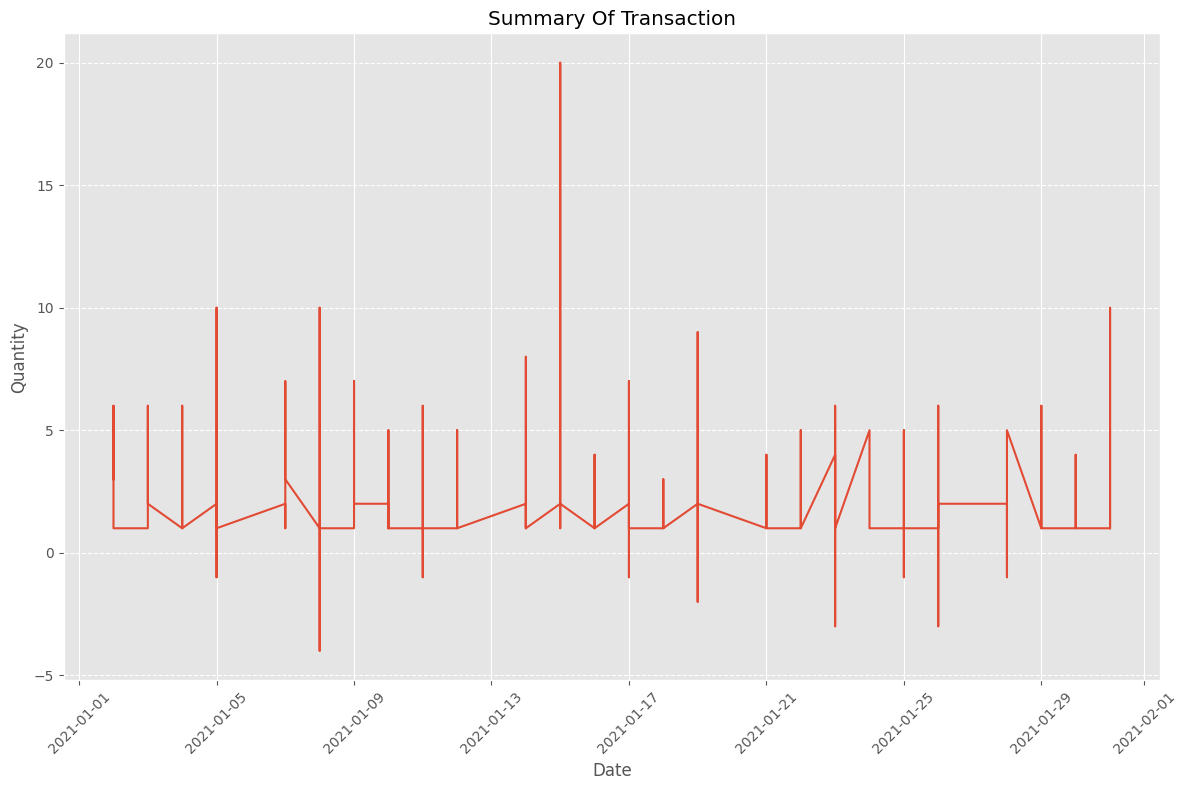

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.plot(df['date'],df['Quantity'])
ax.set_title('Summary Of Transaction')
ax.set_ylabel('Quantity')
ax.set_xlabel('Date')

plt.xticks(rotation=45)
ax.grid(axis='y', linestyle='--')
plt.tight_layout()

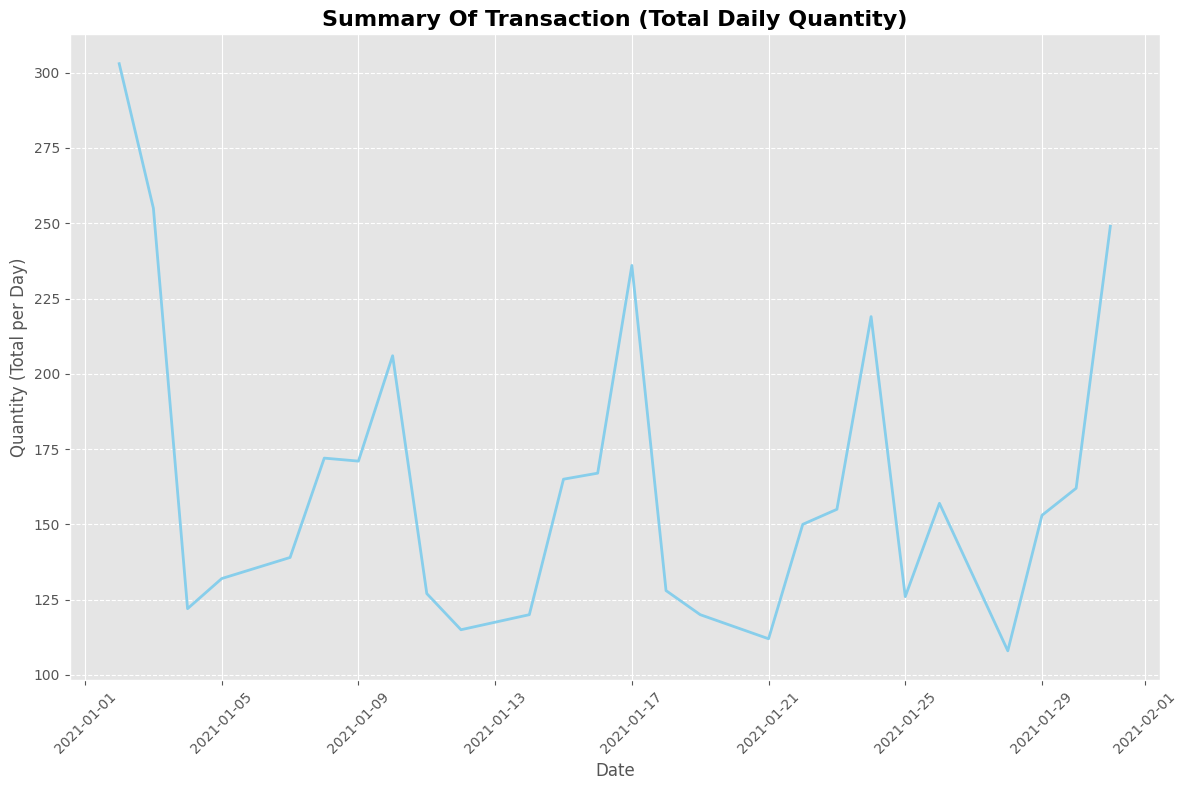

In [ ]:
# Mengelompokkan data berdasarkan tanggal dan menjumlahkan kuantitas
# Ini akan membuat df baru yang merepresentasikan total kuantitas transaksi harian
df_summary = df.groupby('date')['Quantity'].sum().reset_index()

# Membuat plot sesuai permintaan Anda
fig = plt.figure(figsize=(12,8))
ax = plt.axes()

# Menggunakan df_summary untuk plot, dengan 'date' dan 'Quantity' yang sudah diagregasi
ax.plot(df_summary['date'], df_summary['Quantity'], color='skyblue', linewidth=2)

# Mengatur judul dan label sumbu
ax.set_title('Summary Of Transaction (Total Daily Quantity)', fontsize=16, fontweight='bold')
ax.set_ylabel('Quantity (Total per Day)', fontsize=12)
ax.set_xlabel('Date', fontsize=12)

# Mengatur format tanggal pada sumbu X agar lebih mudah dibaca
plt.xticks(rotation=45)
ax.grid(axis='y', linestyle='--')
plt.tight_layout()

# Menampilkan grafik
plt.show()

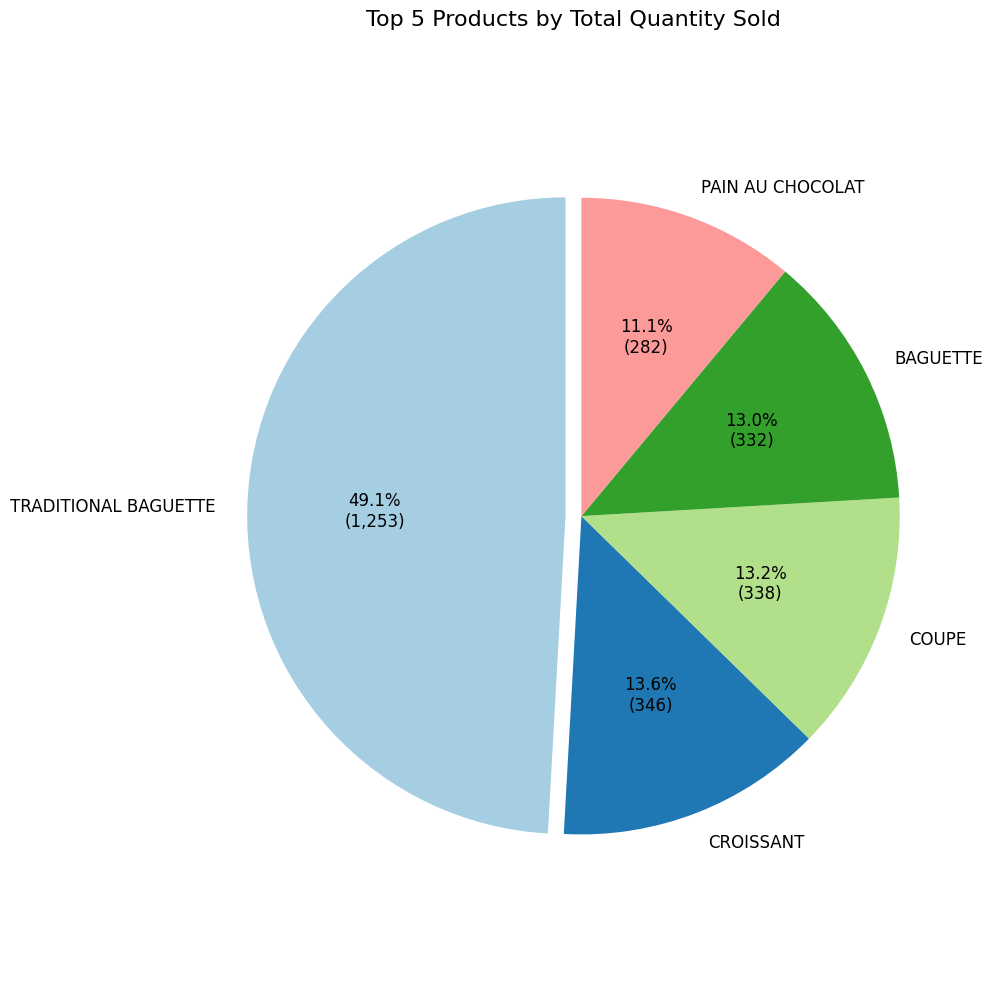

In [ ]:
# 1. Menghitung total Quantity (Kuantitas) yang terjual untuk setiap 'article' (produk)
sales_by_product = df.groupby('article')['Quantity'].sum().reset_index()

# 2. Mengurutkan hasil dari Quantity terbesar ke terkecil
top_products = sales_by_product.sort_values(by='Quantity', ascending=False)

# 3. Mengambil 5 produk teratas
top_5_products = top_products.head(5)

# --- Membuat Diagram Pie ---
plt.figure(figsize=(10, 10))

# Membuat label untuk setiap irisan (slice)
labels = top_5_products['article']
sizes = top_5_products['Quantity']

# Fungsi untuk memformat persentase dengan 1 angka desimal
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        # Menampilkan persentase dan jumlah total unit
        return f'{pct:.1f}%\n({val:,})'
    return my_format

# Explode (memisahkan irisan) untuk menonjolkan produk terlaris (TRADITIONAL BAGUETTE)
explode = [0.05, 0, 0, 0, 0]

plt.pie(
    sizes,
    labels=labels,
    autopct=autopct_format(sizes), # Menggunakan fungsi format kustom
    startangle=90, # Memulai dari atas
    colors=plt.cm.Paired.colors, # Menggunakan skema warna
    explode=explode,
    textprops={'fontsize': 12}
)

plt.title('Top 5 Products by Total Quantity Sold', fontsize=16, pad=20)
plt.axis('equal') # Memastikan diagram pie berbentuk lingkaran
plt.tight_layout()
plt.show()

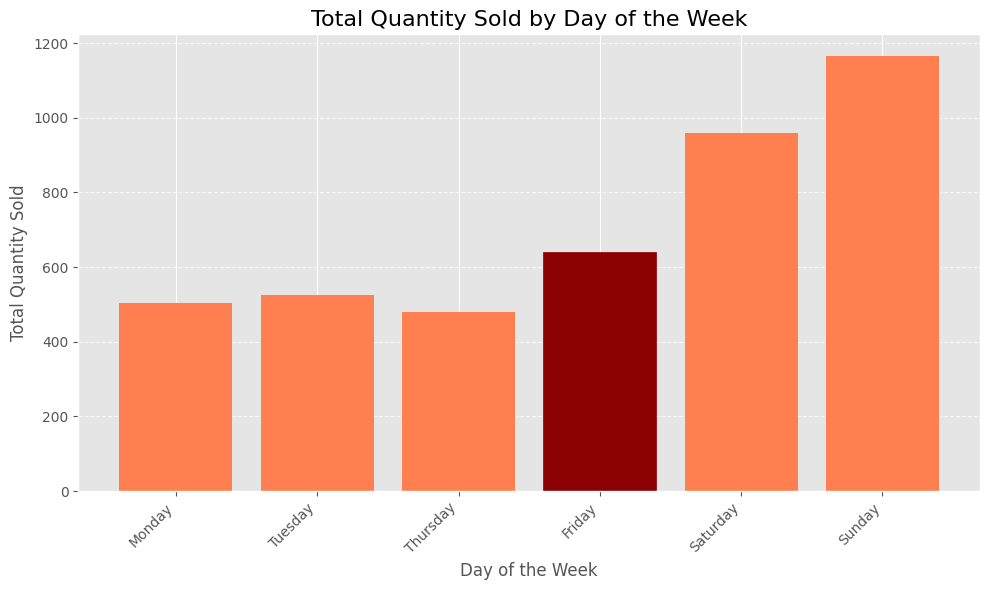

In [ ]:
# 1. Extract the Day of the Week name (e.g., 'Monday', 'Sunday')
# We use .dt.day_name() for the full name.
df['DayOfWeek'] = df['date'].dt.day_name()

# 2. Group by the new 'DayOfWeek' column and sum the 'Quantity'
daily_sales = df.groupby('DayOfWeek')['Quantity'].sum().reset_index()

# 3. Define the correct order for the days of the week for proper plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales['DayOfWeek'] = pd.Categorical(daily_sales['DayOfWeek'], categories=day_order, ordered=True)

# 4. Sort the data by the defined order
daily_sales = daily_sales.sort_values('DayOfWeek')

# --- Visualization ---
plt.figure(figsize=(10, 6))

# Create a bar chart
bars = plt.bar(daily_sales['DayOfWeek'], daily_sales['Quantity'], color='coral')

# Highlight the busiest day (highest bar)
max_quantity = daily_sales['Quantity'].max()
busiest_day_index = daily_sales['Quantity'].idxmax()
bars[busiest_day_index].set_color('darkred')

plt.title('Total Quantity Sold by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

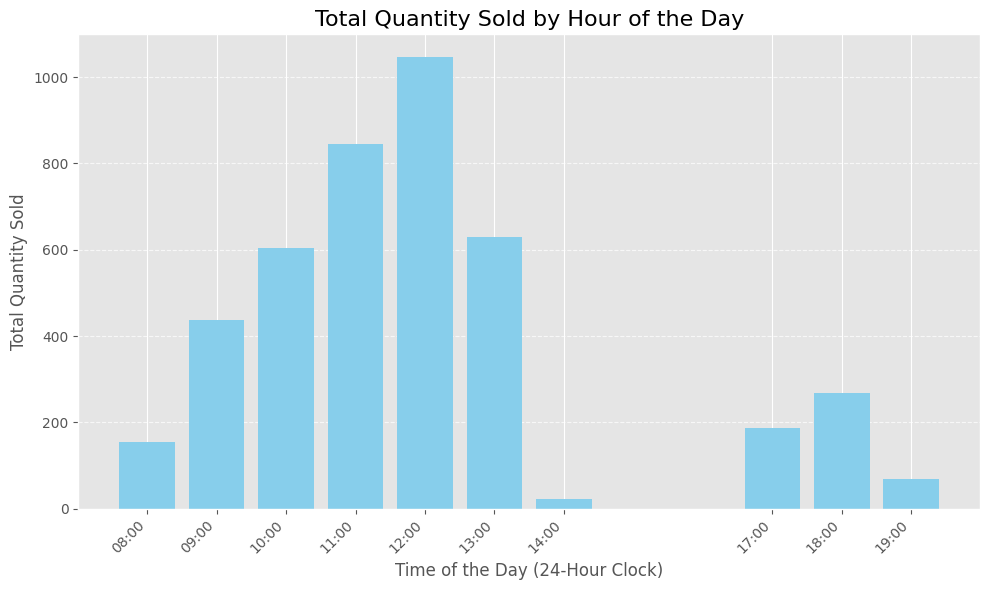

In [ ]:
# 1. Combine 'date' and 'time' columns to create a proper datetime object (optional, but good practice)
# For this analysis, we just need to isolate the hour from the 'time' column.
# We will treat the 'time' column as a string and extract the hour part.
df['Hour'] = df['time'].dt.hour

# 2. Group by the new 'Hour' column and sum the 'Quantity'
hourly_sales = df.groupby('Hour')['Quantity'].sum().reset_index()

# 3. Sort the data by hour for chronological plotting
hourly_sales = hourly_sales.sort_values('Hour')

# --- Visualization ---
plt.figure(figsize=(10, 6))

# Create a bar chart
bars = plt.bar(hourly_sales['Hour'], hourly_sales['Quantity'], color='skyblue')

# Format the X-axis labels to show a clear time range (e.g., '9:00-10:00')
hour_labels = [f'{h:02d}:00' for h in hourly_sales['Hour']]

plt.title('Total Quantity Sold by Hour of the Day', fontsize=16)
plt.xlabel('Time of the Day (24-Hour Clock)', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(hourly_sales['Hour'], labels=hour_labels, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()